# Librerías

In [171]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Preprocesamiento de texto
import re  # Operaciones con expresiones regulares
import string  # Manejo de cadenas y caracteres especiales
import nltk  # Biblioteca de procesamiento de lenguaje natural
from nltk.corpus import stopwords  # Palabras vacías (stopwords) para eliminar
nltk.download('stopwords')  # Descargar lista de stopwords

# Visualización de datos
import seaborn as sns  # Gráficos estadísticos

# División de datos y preprocesamiento
from sklearn.model_selection import train_test_split  # Dividir dataset en entrenamiento y prueba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # Métodos para vectorizar texto

# Modelos clásicos de Machine Learning
from sklearn.linear_model import LogisticRegression  # Regresión logística
from sklearn.ensemble import RandomForestClassifier  # Bosques aleatorios
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Multinomial
from sklearn.svm import SVC  # Máquinas de soporte vectorial (SVM)

# Métricas de evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modelos avanzados
import xgboost as xgb  # XGBoost para clasificación

# Redes neuronales con Keras
from tensorflow.keras.models import Sequential  # Modelo secuencial de Keras
from tensorflow.keras.layers import Dense  # Capa densa para redes neuronales
from tensorflow.keras.optimizers import Adam  # Optimizador Adam para el entrenamiento

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# BaseDeDatos

In [172]:
df_train = pd.read_csv("/kaggle/input/resenasmio/resenasMio (1).csv")

print(df_train.info())
print(df_train['rating'].value_counts())
print(df_train.head())

df_train = df_train.drop_duplicates(subset='review', keep='first')
df_train = df_train.dropna(subset=['review', 'rating'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  2500 non-null   object
 1   rating  2500 non-null   object
dtypes: object(2)
memory usage: 39.2+ KB
None
rating
1     487
4     487
2     483
5     296
3"    267
3     233
5"    203
2"     17
4"     14
1"     13
Name: count, dtype: int64
                                              review rating
0  "Taylor Swift con "Lavender Haze" ofrece una p...      3
1  "Ed Sheeran en 'Eyes Closed' entrega una inter...      3
2  "Taylor Swift en 'Midnight Rain' tiene una let...     3"
3  "La última canción de DJ Snake carece de origi...      1
4  "Perfect" de Ed Sheeran tiene una melodía dulc...      2


In [173]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df_train['review'] = df_train['review'].apply(lambda x: clean_text(x))
df_train['rating'] = df_train['rating'].str.strip('"').astype(int)
df_train['rating'] = df_train['rating'] - 1

df_train['review'].head()

0    taylor swift con lavender haze ofrece una prod...
1    ed sheeran en eyes closed entrega una interpre...
2    taylor swift en midnight rain tiene una letra ...
3    la última canción de dj snake carece de origin...
4    perfect de ed sheeran tiene una melodía dulce ...
Name: review, dtype: object

In [174]:
def text_preprocessing(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokenized_text = tokenizer.tokenize(text)
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [word for word in tokenized_text if word not in stop_words]  
    cleaned_text = ' '.join(cleaned_tokens)  
    return cleaned_text

df_train['review'] = df_train['review'].apply(text_preprocessing)
df_train.head()

,review,rating
0,taylor swift con lavender haze ofrece una prod...,2
1,ed sheeran en eyes closed entrega una interpre...,2
2,taylor swift en midnight rain tiene una letra ...,2
3,la última canción de dj snake carece de origin...,0
4,perfect de ed sheeran tiene una melodía dulce ...,1


<Axes: xlabel='rating'>

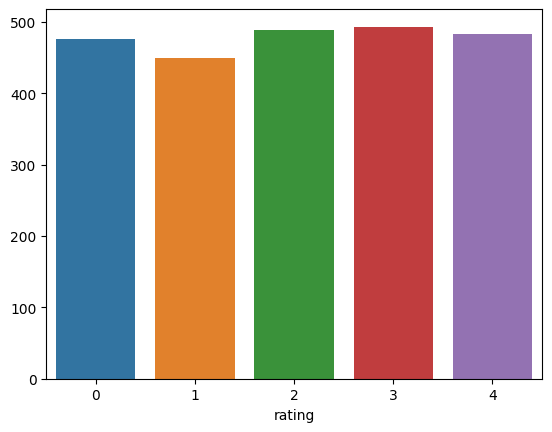

In [175]:
target_counts = df_train['rating'].value_counts()
sns.barplot(x=target_counts.index, y=target_counts.values)

# Modelos

In [176]:
X = df_train['review']  # Las reseñas traducidas
y = df_train['rating']  # Las calificaciones

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Vectores

In [177]:
'''
vectorizer = CountVectorizer()

X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
'''

'\nvectorizer = CountVectorizer()\n\nX_train_vect = vectorizer.fit_transform(X_train)\nX_test_vect = vectorizer.transform(X_test)\n'

In [178]:
vectorizer_tfidf = TfidfVectorizer()

X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

## Regresión logística

In [179]:
'''
print('Comienza')

# Crear el modelo de regresión logística
model = LogisticRegression(
    C=1.0,  
    penalty='l2',  
    solver='liblinear',
    max_iter=2000
)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_vect, y_train)

y_pred_LR = model.predict(X_test_vect)

accuracy_LR = accuracy_score(y_test, y_pred_LR)
conf_matrix = confusion_matrix(y_test, y_pred_LR)
class_report = classification_report(y_test, y_pred_LR)

print(f"Precisión del modelo: {accuracy_LR}")
print("Matriz de confusión:")
print(conf_matrix)
print("Reporte de clasificación:")
print(class_report)
'''

'\nprint(\'Comienza\')\n\n# Crear el modelo de regresión logística\nmodel = LogisticRegression(\n    C=1.0,  \n    penalty=\'l2\',  \n    solver=\'liblinear\',\n    max_iter=2000\n)\n\n# Entrenar el modelo con los datos de entrenamiento\nmodel.fit(X_train_vect, y_train)\n\ny_pred_LR = model.predict(X_test_vect)\n\naccuracy_LR = accuracy_score(y_test, y_pred_LR)\nconf_matrix = confusion_matrix(y_test, y_pred_LR)\nclass_report = classification_report(y_test, y_pred_LR)\n\nprint(f"Precisión del modelo: {accuracy_LR}")\nprint("Matriz de confusión:")\nprint(conf_matrix)\nprint("Reporte de clasificación:")\nprint(class_report)\n'

In [180]:
'''
print('Comienza')

# Crear el modelo de regresión logística
model = LogisticRegression(
    C=1.0,  
    penalty='l2',  
    solver='liblinear',
    max_iter=2000
)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_tfidf, y_train)

y_pred_LR = model.predict(X_test_tfidf)

accuracy_LR_tfidf = accuracy_score(y_test, y_pred_LR)
conf_matrix = confusion_matrix(y_test, y_pred_LR)
class_report = classification_report(y_test, y_pred_LR)

print(f"Precisión del modelo: {accuracy_LR_tfidf}")
print("Matriz de confusión:")
print(conf_matrix)
print("Reporte de clasificación:")
print(class_report)
'''

'\nprint(\'Comienza\')\n\n# Crear el modelo de regresión logística\nmodel = LogisticRegression(\n    C=1.0,  \n    penalty=\'l2\',  \n    solver=\'liblinear\',\n    max_iter=2000\n)\n\n# Entrenar el modelo con los datos de entrenamiento\nmodel.fit(X_train_tfidf, y_train)\n\ny_pred_LR = model.predict(X_test_tfidf)\n\naccuracy_LR_tfidf = accuracy_score(y_test, y_pred_LR)\nconf_matrix = confusion_matrix(y_test, y_pred_LR)\nclass_report = classification_report(y_test, y_pred_LR)\n\nprint(f"Precisión del modelo: {accuracy_LR_tfidf}")\nprint("Matriz de confusión:")\nprint(conf_matrix)\nprint("Reporte de clasificación:")\nprint(class_report)\n'

## Naive Bayes

In [181]:
'''
naive_bayes_model = MultinomialNB(
    alpha=1.0,  
    fit_prior=True,  
    class_prior=None  
)
naive_bayes_model.fit(X_train_vect, y_train)

y_pred_NB = naive_bayes_model.predict(X_test_vect)
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f"Accuracy: {accuracy_NB:.4f}")

print("Matriz de confusión:")
print(conf_matrix)
conf_matrix = confusion_matrix(y_test, y_pred_LR)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_NB))
'''

'\nnaive_bayes_model = MultinomialNB(\n    alpha=1.0,  \n    fit_prior=True,  \n    class_prior=None  \n)\nnaive_bayes_model.fit(X_train_vect, y_train)\n\ny_pred_NB = naive_bayes_model.predict(X_test_vect)\naccuracy_NB = accuracy_score(y_test, y_pred_NB)\nprint(f"Accuracy: {accuracy_NB:.4f}")\n\nprint("Matriz de confusión:")\nprint(conf_matrix)\nconf_matrix = confusion_matrix(y_test, y_pred_LR)\n\nprint("\nReporte de clasificación:")\nprint(classification_report(y_test, y_pred_NB))\n'

In [182]:
'''
naive_bayes_model = MultinomialNB(
    alpha=1.0,  
    fit_prior=True,  
    class_prior=None  
)
naive_bayes_model.fit(X_train_tfidf, y_train)

y_pred_NB = naive_bayes_model.predict(X_test_tfidf)
accuracy_NB_tfidf = accuracy_score(y_test, y_pred_NB)
print(f"Accuracy: {accuracy_NB_tfidf:.4f}")

print("Matriz de confusión:")
print(conf_matrix)
conf_matrix = confusion_matrix(y_test, y_pred_LR)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_NB))
'''

'\nnaive_bayes_model = MultinomialNB(\n    alpha=1.0,  \n    fit_prior=True,  \n    class_prior=None  \n)\nnaive_bayes_model.fit(X_train_tfidf, y_train)\n\ny_pred_NB = naive_bayes_model.predict(X_test_tfidf)\naccuracy_NB_tfidf = accuracy_score(y_test, y_pred_NB)\nprint(f"Accuracy: {accuracy_NB_tfidf:.4f}")\n\nprint("Matriz de confusión:")\nprint(conf_matrix)\nconf_matrix = confusion_matrix(y_test, y_pred_LR)\n\nprint("\nReporte de clasificación:")\nprint(classification_report(y_test, y_pred_NB))\n'

## Suport Vector Machine

In [183]:
'''
print('Comienza')
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vect, y_train)

y_pred_SVM = svm_model.predict(X_test_vect)

accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print(f"Accuracy: {accuracy_SVM:.4f}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_SVM))
'''

'\nprint(\'Comienza\')\nsvm_model = SVC(kernel=\'linear\')\nsvm_model.fit(X_train_vect, y_train)\n\ny_pred_SVM = svm_model.predict(X_test_vect)\n\naccuracy_SVM = accuracy_score(y_test, y_pred_SVM)\nprint(f"Accuracy: {accuracy_SVM:.4f}")\n\n# Reporte de clasificación\nprint("\nReporte de clasificación:")\nprint(classification_report(y_test, y_pred_SVM))\n'

In [184]:
'''
print('Comienza')
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

y_pred_SVM = svm_model.predict(X_test_tfidf)

accuracy_SVM_tfidf = accuracy_score(y_test, y_pred_SVM)
print(f"Accuracy: {accuracy_SVM_tfidf:.4f}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_SVM))
'''

'\nprint(\'Comienza\')\nsvm_model = SVC(kernel=\'linear\')\nsvm_model.fit(X_train_tfidf, y_train)\n\ny_pred_SVM = svm_model.predict(X_test_tfidf)\n\naccuracy_SVM_tfidf = accuracy_score(y_test, y_pred_SVM)\nprint(f"Accuracy: {accuracy_SVM_tfidf:.4f}")\n\n# Reporte de clasificación\nprint("\nReporte de clasificación:")\nprint(classification_report(y_test, y_pred_SVM))\n'

## Random Forest

In [185]:
'''
print('Comienza')
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train_vect, y_train)

y_pred_RF = rf_model.predict(X_test_vect)

accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f"Accuracy: {accuracy_RF:.4f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_RF))
'''

'\nprint(\'Comienza\')\nrf_model = RandomForestClassifier(n_estimators=10, random_state=42)\nrf_model.fit(X_train_vect, y_train)\n\ny_pred_RF = rf_model.predict(X_test_vect)\n\naccuracy_RF = accuracy_score(y_test, y_pred_RF)\nprint(f"Accuracy: {accuracy_RF:.4f}")\n\nprint("\nReporte de clasificación:")\nprint(classification_report(y_test, y_pred_RF))\n'

In [186]:
'''
print('Comienza')
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

y_pred_RF = rf_model.predict(X_test_tfidf)

accuracy_RF_tfidf = accuracy_score(y_test, y_pred_RF)
print(f"Accuracy: {accuracy_RF_tfidf:.4f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_RF))
'''

'\nprint(\'Comienza\')\nrf_model = RandomForestClassifier(n_estimators=1000, random_state=42)\nrf_model.fit(X_train_tfidf, y_train)\n\ny_pred_RF = rf_model.predict(X_test_tfidf)\n\naccuracy_RF_tfidf = accuracy_score(y_test, y_pred_RF)\nprint(f"Accuracy: {accuracy_RF_tfidf:.4f}")\n\nprint("\nReporte de clasificación:")\nprint(classification_report(y_test, y_pred_RF))\n'

## Red Neuronal

In [187]:
'''
print('Comienza')
nn_model = Sequential()

nn_model.add(Dense(128, input_dim=X_train_vect.shape[1], activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # Para clasificación binaria
nn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(X_train_vect, y_train, epochs=10, batch_size=32, validation_data=(X_test_vect, y_test))

y_pred_nn = (nn_model.predict(X_test_vect) > 0.5).astype("int32")

accuracy_NN = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy: {accuracy_NN:.4f}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_nn))
'''

'\nprint(\'Comienza\')\nnn_model = Sequential()\n\nnn_model.add(Dense(128, input_dim=X_train_vect.shape[1], activation=\'relu\'))\nnn_model.add(Dense(64, activation=\'relu\'))\nnn_model.add(Dense(1, activation=\'sigmoid\'))  # Para clasificación binaria\nnn_model.compile(optimizer=Adam(), loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n\nhistory = nn_model.fit(X_train_vect, y_train, epochs=10, batch_size=32, validation_data=(X_test_vect, y_test))\n\ny_pred_nn = (nn_model.predict(X_test_vect) > 0.5).astype("int32")\n\naccuracy_NN = accuracy_score(y_test, y_pred_nn)\nprint(f"Accuracy: {accuracy_NN:.4f}")\n\n# Reporte de clasificación\nprint("\nReporte de clasificación:")\nprint(classification_report(y_test, y_pred_nn))\n'

In [188]:
'''
print('Comienza')
nn_model = Sequential()

nn_model.add(Dense(128, input_dim=X_train_vect.shape[1], activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # Para clasificación binaria
nn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(X_train_vect, y_train, epochs=10, batch_size=32, validation_data=(X_test_vect, y_test))

y_pred_nn = (nn_model.predict(X_test_vect) > 0.5).astype("int32")

accuracy_NN_tfidf = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy: {accuracy_NN_tfidf:.4f}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_nn))
'''

'\nprint(\'Comienza\')\nnn_model = Sequential()\n\nnn_model.add(Dense(128, input_dim=X_train_vect.shape[1], activation=\'relu\'))\nnn_model.add(Dense(64, activation=\'relu\'))\nnn_model.add(Dense(1, activation=\'sigmoid\'))  # Para clasificación binaria\nnn_model.compile(optimizer=Adam(), loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n\nhistory = nn_model.fit(X_train_vect, y_train, epochs=10, batch_size=32, validation_data=(X_test_vect, y_test))\n\ny_pred_nn = (nn_model.predict(X_test_vect) > 0.5).astype("int32")\n\naccuracy_NN_tfidf = accuracy_score(y_test, y_pred_nn)\nprint(f"Accuracy: {accuracy_NN_tfidf:.4f}")\n\n# Reporte de clasificación\nprint("\nReporte de clasificación:")\nprint(classification_report(y_test, y_pred_nn))\n'

## XGBoost

In [189]:

print('Comienza')
xgboost_model = xgb.XGBClassifier(max_depth=7, 
                            n_estimators=2000, 
                            colsample_bytree=0.8, 
                            subsample=0.8, 
                            nthread=10, 
                            learning_rate=0.1)

xgboost_model.fit(X_train_vect, y_train)
y_pred_xgb = xgboost_model.predict(X_test_vect)

# Calcular la precisión
accuracy_XG = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_XG:.4f}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_xgb))


Comienza
Accuracy: 0.9498

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        91
           1       0.93      0.88      0.91        95
           2       0.94      0.96      0.95       106
           3       0.98      0.95      0.96        96
           4       0.97      0.98      0.97        90

    accuracy                           0.95       478
   macro avg       0.95      0.95      0.95       478
weighted avg       0.95      0.95      0.95       478



In [190]:
'''
print('Comienza')
xgboost_model = xgb.XGBClassifier(max_depth=7, 
                            n_estimators=2000,
                            colsample_bytree=0.8, 
                            subsample=0.8, 
                            nthread=10, 
                            learning_rate=0.1)

xgboost_model.fit(X_train_tfidf, y_train)

y_pred_xgb = xgboost_model.predict(X_test_tfidf)

# Calcular la precisión
accuracy_XG_tfidf = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_XG_tfidf:.4f}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_xgb))
'''

'\nprint(\'Comienza\')\nxgboost_model = xgb.XGBClassifier(max_depth=7, \n                            n_estimators=2000,\n                            colsample_bytree=0.8, \n                            subsample=0.8, \n                            nthread=10, \n                            learning_rate=0.1)\n\nxgboost_model.fit(X_train_tfidf, y_train)\n\ny_pred_xgb = xgboost_model.predict(X_test_tfidf)\n\n# Calcular la precisión\naccuracy_XG_tfidf = accuracy_score(y_test, y_pred_xgb)\nprint(f"Accuracy: {accuracy_XG_tfidf:.4f}")\n\n# Reporte de clasificación\nprint("\nReporte de clasificación:")\nprint(classification_report(y_test, y_pred_xgb))\n'

## Evaluacion de modelos

In [191]:
models = pd.DataFrame({
    'Model': ['Logistic Regression Classifier', 'Naives Bayes Classifier', 'Supor Vector Machine', 
              'Random Forest', 'Red Neuronal', 'XGBoost', 
             'Logistic Regression Classifier tfiddf', 'Naives Bayes Classifier tfiddf', 'Supor Vector Machine tfiddf', 
              'Random Forest tfiddf', 'Red Neuronal tfiddf', 'XGBoost tfiddf'],
    'Score': [accuracy_LR, accuracy_NB, accuracy_SVM, accuracy_RF, accuracy_NN, accuracy_XG,
              accuracy_LR_tfidf, accuracy_NB_tfidf, accuracy_SVM_tfidf, accuracy_RF_tfidf, accuracy_NN_tfidf, accuracy_XG_tfidf]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,XGBoost,0.949791
2,Supor Vector Machine,0.945607
0,Logistic Regression Classifier,0.943515
8,Supor Vector Machine tfiddf,0.941423
11,XGBoost tfiddf,0.937238
3,Random Forest,0.926778
6,Logistic Regression Classifier tfiddf,0.926778
9,Random Forest tfiddf,0.926778
1,Naives Bayes Classifier,0.907950
7,Naives Bayes Classifier tfiddf,0.887029


In [192]:
xgboost_model.fit(X_train_vect, y_train)
y_pred_xgb = xgboost_model.predict(X_test_vect)

import joblib

joblib.dump((xgboost_model, vectorizer), 'resenas.pkl')

['resenas.pkl']